### Q1. Implementing the Least Squares Solution $ W_{ML} $ to the Regression Problem using Analytical Solution

The least squares solution to the regression problem can be computed analytically using the following formula:

$$
W_{ML} = \left( X^T X \right)^{-1} X^T y
$$

where:
- $X$ is the feature matrix of shape (features × datapoints),
- $y$ is the target vector of shape (datapoints × 1),
- $W_{ML}$ represents the optimal weights minimizing the squared error.


In [30]:
import pandas as pd
df_train = pd.read_csv('/content/FMLA1Q1Data_train.csv', header=None)
df_train.head()

,0,1,2
0,0.53767,0.67370,9.7251
1,1.83390,-0.66911,11.1090
2,-2.25880,-0.40032,22.0270
3,0.86217,-0.67180,2.4278
4,0.31877,0.57563,6.5156


In [31]:
df_test = pd.read_csv('/content/FMLA1Q1Data_test.csv', header=None)
df_test.head()

,0,1,2
0,0.87060,-0.73016,2.4105
1,0.33076,-0.91633,1.6318
2,-1.34790,1.78760,12.3770
3,1.54790,-0.82040,6.8406
4,-0.61664,-0.19671,1.6138


In [34]:
import numpy as np
dummy_feature = np.ones((len(df_train),1))
X = np.column_stack((dummy_feature, df_train.iloc[:,:-1])).T

y = df_train.iloc[:,-1]

In [35]:
X_X_transpose = np.matmul(X, X.T)
X_X_transpose_inverse = np.linalg.inv(X_X_transpose)


In [36]:
X_Y = np.matmul(X,y)
w_ML = np.matmul(X_X_transpose_inverse, X_Y)
print(np.round(w_ML,2))


[9.89 1.77 3.52]


Our required $ W_{ML}$ is [9.89 1.77 3.52]

## Q1.2 - Gradient Descent Algorithm with suitable step size to solve the least squares algoritms and plot wt-wML as a function of t.

Gradient descent is an iterative optimization algorithm used to minimize a function. For a linear regression model, the update rule for the weights $W$ is given by:

$$
W^{(t+1)} = W^{(t)} - \alpha \nabla J(W^{(t)})
$$

Where:
- $W^{(t)}$ are the weights at iteration \( t \),
- $\alpha$ is the learning rate,
- $\nabla J(W^{(t)})$ is the gradient of the cost function $J$ with respect to $W$ at iteration $t$.

The loss function is of the form:
    $$ J_{\text{ridge}}(w) =  \frac{1}{N}*\|X^T w - y\|^2$$
This process continues until convergence, i.e., until the changes in \( W \) become sufficiently small.

But, here we are training this gradient descent algorithm for a limited number of iterations.

In [43]:
# Gradient descent parameters
eta = 0.01 # This is the step size, also called as learning rate
num_iters = 1000 # no of iterations
w = np.random.randn(X.shape[0]) # Initial W

norm_diff = [] # Storing the norm difference between w and W_ML at every iteration

for i in range(num_iters):
    gradient = (1 / X.shape[1]) * X @ (X.T @ w - y)
    w = w - eta * gradient
    norm_diff.append(np.linalg.norm(w - w_ML)**2)


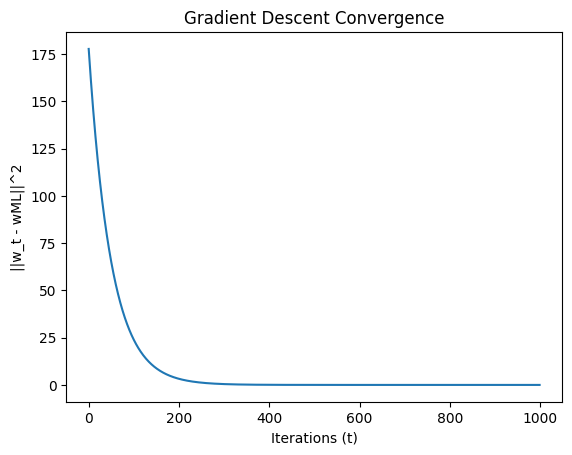

In [44]:
import matplotlib.pyplot as plt
plt.plot(norm_diff)
plt.xlabel('Iterations (t)')
plt.ylabel('||w_t - wML||^2')
plt.title('Gradient Descent Convergence')
plt.show()

# Q1.3 - Stochastic Gradient algorithm using batch size of 100 and plot wt-wML as a function of t.

### Stochastic Gradient Descent (SGD) Problem
We need to solve the least squares problem using the stochastic gradient descent (SGD) algorithm with a batch size of 100. The aim is to minimize the mean squared error between the predicted and actual values, while updating the weights incrementally using small random batches of data.

Unlike batch gradient descent, which computes the gradient using the entire dataset, SGD updates the weights using only a small random batch of data points at each step. This makes the algorithm faster and more scalable for large datasets.

For a batch size of 100, the gradient update rule for SGD is:

$$
w_{t+1} = w_t - \eta \nabla J(w_t)
$$

Where:
- $\eta $ is the learning rate (or step size).
- $\nabla J(w_t)$ is the gradient of the cost function with respect to $ w $, computed using a randomly sampled batch of 100 points at each iteration.



In [49]:
batch_size = 100
eta = 0.01 # step size
num_iterations = 500
num_batches = X.shape[1] // batch_size
w_sgd = np.random.randn(X.shape[0])

# To store the difference ||wt - wML||^2 at each iteration
wt_wml_diff = []

In [50]:
# SGD Loop
for t in range(num_iterations):
  # Randomly shuffle the data at each iteration
  indices = np.random.permutation(X.shape[1])

  # Select a random batch of data points
  batch_indices = indices[:batch_size]
  X_batch = X[:, batch_indices]  # Select the columns corresponding to batch indices
  y_batch = y[batch_indices]

  # Compute the gradient for the current batch
  gradient = 1/batch_size * X_batch @ (X_batch.T@w_sgd - y_batch)

  # Update the weights
  w_sgd = w_sgd - eta * gradient

  # Compute and store ||wt - wML||^2
  wt_wml_diff.append(np.linalg.norm(w_sgd - w_ML) ** 2)

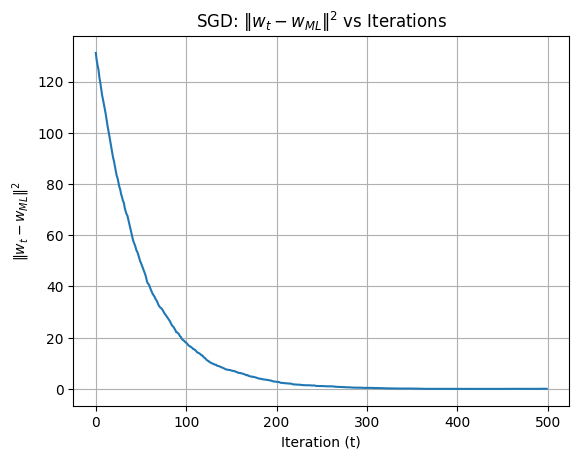

In [51]:
# Plot the difference ||wt - wML||^2 as a function of iteration t
plt.plot(range(num_iterations), wt_wml_diff)
plt.xlabel('Iteration (t)')
plt.ylabel(r'$\|w_t - w_{ML}\|^2$')
plt.title('SGD: $\|w_t - w_{ML}\|^2$ vs Iterations')
plt.grid(True)
plt.show()

#Q1.4 - Following need to be implemented:
1. **Write a function** to compute the gradient of the ridge regression cost function.
2. **Implement gradient descent** to update the weights iteratively.
3. **Perform cross-validation** to select the best value for $\lambda$.
4. **Plot the validation error** as a function of $\lambda$ and choose the best $\lambda$.
5. **Compare the test error** of $w_R$ (ridge regression) and $w_{\text{ML}}$ (least squares) on the test dataset, and analyze which model performs better and why.

Ridge regression is a regularized version of least squares regression that helps to prevent overfitting by penalizing large values of the model parameters. The objective function for ridge regression is:

$$
J_{\text{ridge}}(w) =  \frac{1}{N}*\|X^T w - y\|^2 + {\lambda} \|w\|^2
$$

Where:
- $w$ is the weight vector to be learned.
- $x_i$ are the feature vectors.
- $y_i$ are the target values.
- $N$ is the number of data points.
- $\lambda$ is the regularization parameter that controls the penalty on large weight values.

The regularization term $\lambda \|w\|^2 $ discourages large values of $w$, which helps to mitigate overfitting, especially when the model has many features or the data is noisy.

In [52]:
df_test = pd.read_csv('/content/FMLA1Q1Data_test.csv', header=None)
X_test = df_test.iloc[:,:-1].values.T
y_test = df_test.iloc[:,-1].values
X_test = np.vstack([np.ones(X_test.shape[1]), X_test])

In [66]:
N = len(X[1])
X_train = X[:,:int(0.75*N)]
X_val = X[:, int(0.75*N):]
y_train = y[:int(0.75*N)]
y_val = y[int(0.75*N):]

In [69]:
# Ridge Regression parameters
lambdas = [0.001, 0.01,0.1,0.5] + list(np.arange(1, 251, 1))
best_lambda = None
best_val_error = float('inf')
w_best = None

In [78]:
ridge_error = []

In [79]:
# Gradient Descent with Ridge Regression
for lmbda in lambdas:
    w_ridge = [0,0,0] # Initialise zero values for weights

    for t in range(num_iters):
        gradient = (1/X_train.shape[1])* X_train @ (X_train.T@w - y_train) + 2 * lmbda * w
        w_ridge = w_ridge - eta * gradient

    # Compute validation error (Mean Squared Error)
    val_error = np.mean((X_val.T @ w_ridge - y_val)**2)
    ridge_error.append(val_error)  # Store validation error for plotting
    if val_error < best_val_error:
        best_val_error = val_error
        best_lambda = lmbda
        w_best = w_ridge

print("Best lambda:", best_lambda)

Best lambda: 0.001


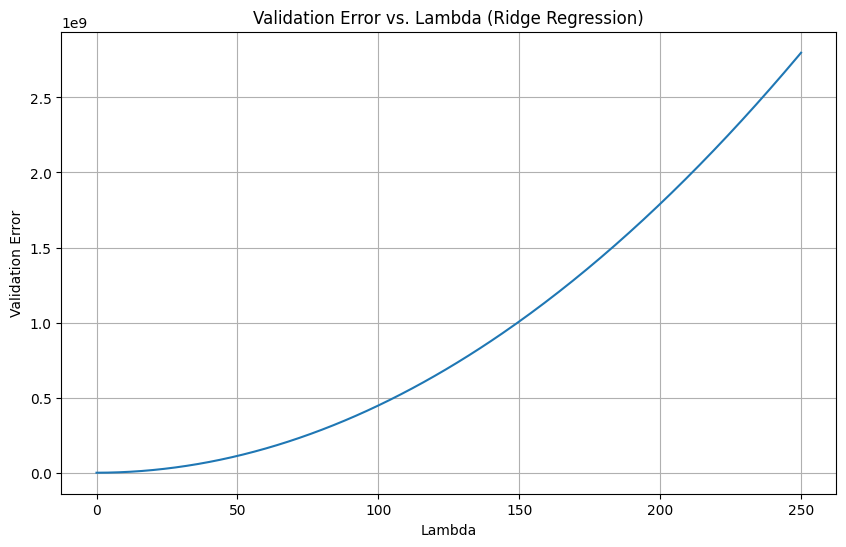

In [80]:
# Plot error vs lambda
plt.figure(figsize=(10, 6))
plt.plot(lambdas, ridge_error)
plt.xlabel('Lambda')
plt.ylabel('Validation Error')
plt.title('Validation Error vs. Lambda (Ridge Regression)')
plt.grid(True)
plt.show()

In [81]:
# Compare test errors for wR (Ridge) and wML
test_error_wR = np.mean((X_test.T @ w_best - y_test)**2)
test_error_wML = np.mean((X_test.T @ w_ML - y_test)**2)

print("Test error (Ridge Regression):", test_error_wR)
print("Test error (Least Squares):", test_error_wML)

Test error (Ridge Regression): 139.84798155109468
Test error (Least Squares): 66.00545933461238


## We can observe that Least Squares is performing better than ridge regression, means there is no need of regularization in the linear process since linear regression is not going to overfit the given dataset, and least squares is able to give the best result.

# Q1.5 - Following need to be implemented:
1. Choose a suitable kernel function for the regression task.
2. Implement the kernel regression algorithm.
3. Predict the output for the test dataset.
4. Argue whether the chosen kernel provides better results than the standard least squares regression.

#### Choosing a Kernel
The choice of kernel depends on the characteristics of the data. Common kernel functions include:
- **Polynomial Kernel**: $K(x, x_i) = (x^T x_i + c)^d$
- **Gaussian (RBF) Kernel**: $K(x, x_i) = \exp\left(-\frac{\|x - x_i\|^2}{2\sigma^2}\right)$

In [84]:
# Extract features from X (now X is d x n)
X1 = X[1, :]  # First feature (x1)
X2 = X[2, :]  # Second feature (x2)

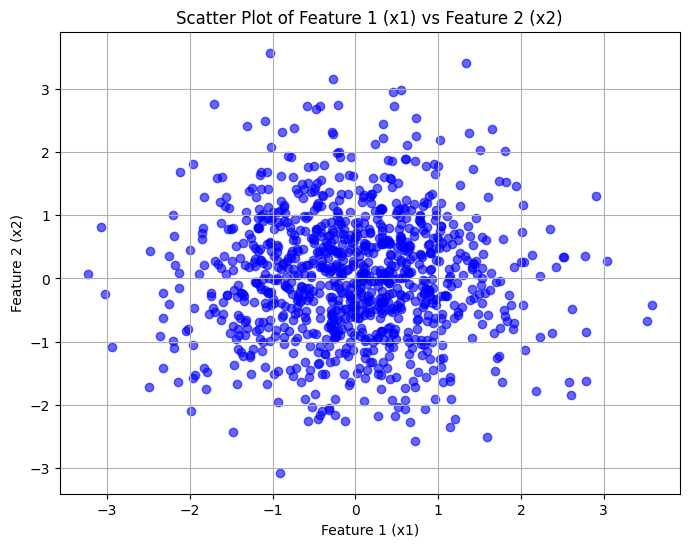

In [85]:
# Scatter plot of X1 vs X2
plt.figure(figsize=(8, 6))
plt.scatter(X1, X2, alpha=0.6, color='blue')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Scatter Plot of Feature 1 (x1) vs Feature 2 (x2)')
plt.grid(True)
plt.show()

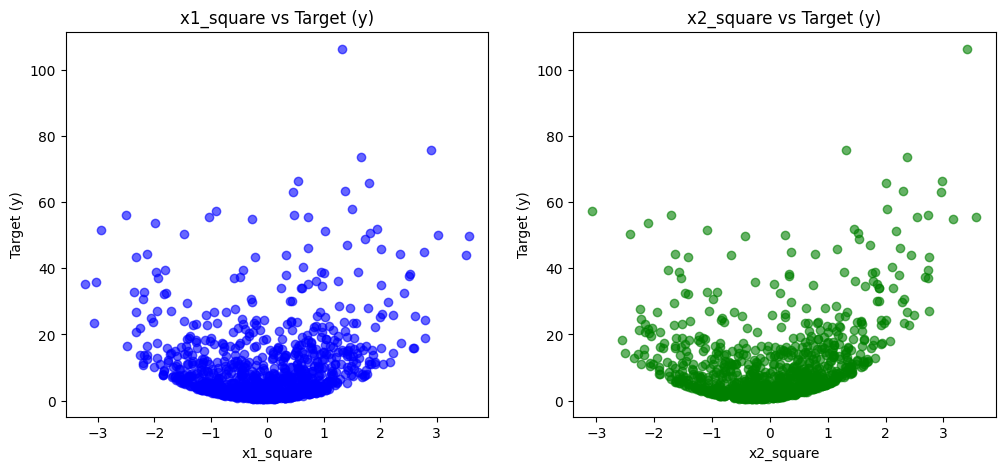

In [89]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1, y, alpha=0.6, color='blue')
plt.xlabel('x1_square')
plt.ylabel('Target (y)')
plt.title('x1_square vs Target (y)')

# Scatter plot of Feature 2 (x2) vs Target (y)
plt.subplot(1, 2, 2)
plt.scatter(X2, y, alpha=0.6, color='green')
plt.xlabel('x2_square')
plt.ylabel('Target (y)')
plt.title('x2_square vs Target (y)')

plt.show()

#Seems that polynomial kernel will work out

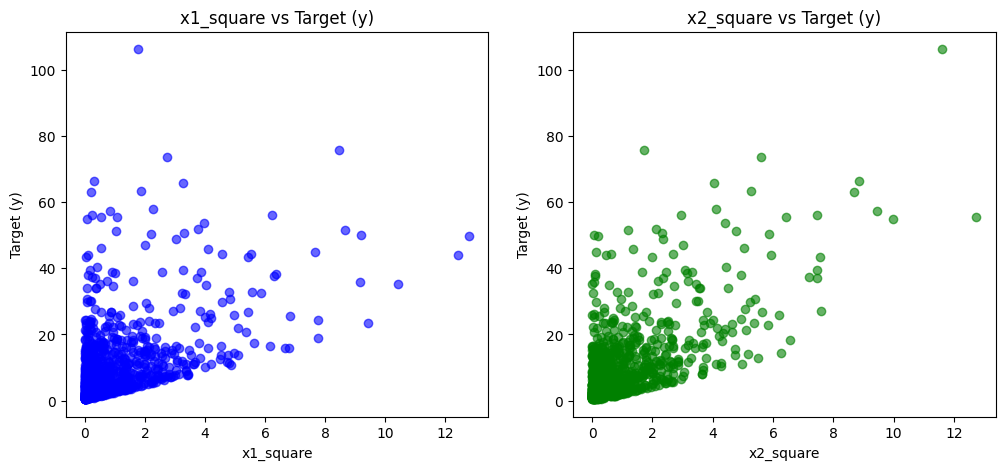

In [87]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1**2, y, alpha=0.6, color='blue')
plt.xlabel('x1_square')
plt.ylabel('Target (y)')
plt.title('x1_square vs Target (y)')

# Scatter plot of Feature 2 (x2) vs Target (y)
plt.subplot(1, 2, 2)
plt.scatter(X2**2, y, alpha=0.6, color='green')
plt.xlabel('x2_square')
plt.ylabel('Target (y)')
plt.title('x2_square vs Target (y)')

plt.show()

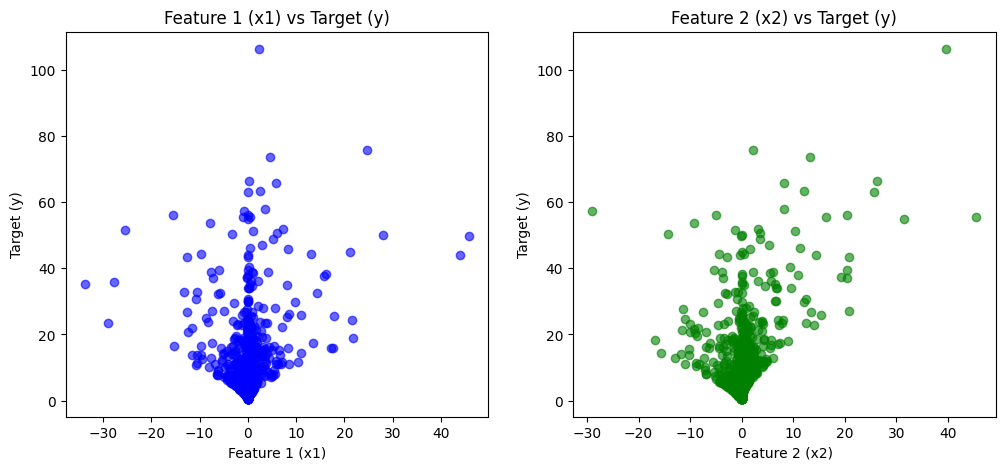

In [90]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1**3, y, alpha=0.6, color='blue')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Target (y)')
plt.title('Feature 1 (x1) vs Target (y)')

# Scatter plot of Feature 2 (x2) vs Target (y)
plt.subplot(1, 2, 2)
plt.scatter(X2**3, y, alpha=0.6, color='green')
plt.xlabel('Feature 2 (x2)')
plt.ylabel('Target (y)')
plt.title('Feature 2 (x2) vs Target (y)')

plt.show()

We can observe that there is a polynomial relationship between the features (say, x1 and x2) with the target. So, it is a right choice to go with polynomial kernel.

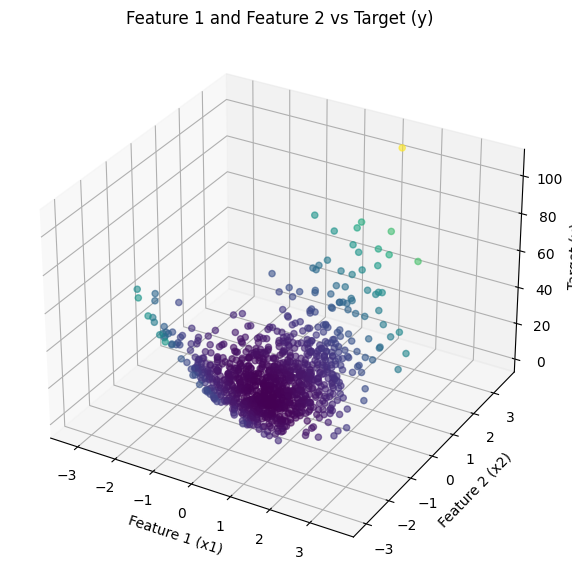

In [91]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, y, c=y, cmap='viridis', alpha=0.6)
ax.set_xlabel('Feature 1 (x1)')
ax.set_ylabel('Feature 2 (x2)')
ax.set_zlabel('Target (y)')
ax.set_title('Feature 1 and Feature 2 vs Target (y)')
plt.show()

## Implementing polynomial Kernel Regression

In [92]:
def polynomial_kernel(X_1, X_2, degree=2, coef0=1):
    """Compute the polynomial kernel matrix."""
    return (X_1.T@X_2 +1)**degree

def mean_squared_error(y_true, y_pred):
    """Calculate Mean Squared Error."""
    return np.mean((y_pred - y_true) ** 2)

In [93]:
X = X[1:,:]
X_test = X_test[1:,:]

In [94]:
degree = [2,3,4]  # Degree of the polynomial kernel
coef0 = 1   # Constant term (can be tuned)

# Variables to track the best predictions and lowest error
best_degree = None
best_y_pred = None
lowest_error = float('inf')

# Loop over each degree and perform kernel regression without regularization
for deg in degree:
    print(f"Degree: {deg}")

    # Compute the polynomial kernel matrix for the training data
    K = polynomial_kernel(X, X, degree=deg, coef0=coef0)

    # Solve for alpha: α = K_train^(-1) * y_train
    alpha = (np.linalg.pinv(K))@y

    # Compute the polynomial kernel matrix for the test data
    K_test = polynomial_kernel(X_test, X, degree=deg, coef0=coef0)

    # Predict for test data
    y_pred_poly = K_test @ alpha

    # Calculate the test error (Mean Squared Error)
    test_error_poly = mean_squared_error(y_test, y_pred_poly)
    print(f"Test error (Polynomial Kernel with degree {deg}): {test_error_poly}\n")

    # Update best predictions if current error is lower
    if test_error_poly < lowest_error:
        lowest_error = test_error_poly
        best_degree = deg
        best_y_pred = y_pred_poly
print('Best Degree is ',best_degree)


Degree: 2
Test error (Polynomial Kernel with degree 2): 0.010409911383781816

Degree: 3
Test error (Polynomial Kernel with degree 3): 0.009860483167000016

Degree: 4
Test error (Polynomial Kernel with degree 4): 0.009925857376081761

Best Degree is  3


# Visualizing the predictions and actual targets

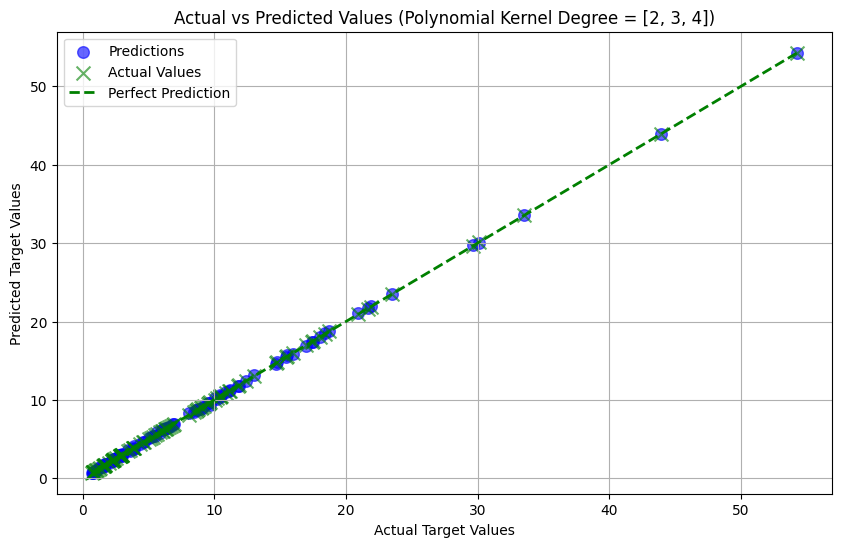

In [95]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_y_pred, color='blue', alpha=0.6, label='Predictions', marker='o', s= 70)
plt.scatter(y_test, y_test, color='green', alpha=0.6, label='Actual Values', marker='x', s=100)
# Plot identity line (y = y) to indicate perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title(f'Actual vs Predicted Values (Polynomial Kernel Degree = {degree})')
plt.legend()
plt.grid(True)
plt.show()

# Predicting the test error of $W_{ML}$

In [96]:
X_test = df_test.iloc[:,:-1].values.T
y_test = df_test.iloc[:,-1].values
X_test = np.vstack([np.ones(X_test.shape[1]), X_test])
y_pred_ls = X_test.T @ w_ML
test_error_ls = mean_squared_error(y_test, y_pred_ls)
print(f"Test error (Least Squares): {test_error_ls}")

Test error (Least Squares): 66.00545933461238


# The best error which we got with polynomial Kernel regression of degree 3 is 0.00986, while with standard least squares, we got an error of 66.005. Hence, the kernel regression which I have chosen is better than the standard least squares regression  
